## data cleaning

In [1]:
#imports
import sys
import os
from os.path import join
import glob
import pandas as pd
import numpy as np
import time
%load_ext autoreload

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# load data
dataroot = '/content/drive/MyDrive/IDS(attacks&Defense)'
SEED=2

In [4]:
df_data=pd.read_csv("/content/drive/MyDrive/CICIDS2017/data_set.csv")
df_data.shape

(2830743, 79)

In [5]:
df = df_data.sample(frac =.5, random_state = np.random.permutation(len(df_data)))
#df = df_data
print (df.shape)
#df.describe()
del df_data

(1415372, 79)


In [6]:
#df = df[:5000]
#df.shape

In [7]:
#df.info()

In [8]:
#df.head()

In [9]:
# lets count if there is NaN values in our dataframe( AKA missing features)
#we should see `0`
df.isnull().sum().sum()

706

In [10]:
# from matplotlib.pyplot import figure
# figure(figsize=(12, 3), dpi=80)
# df.isna().sum().plot(kind='bar')

In [11]:
q1 = df.loc[df['Label'] == 'Web Attack-Sql Injection'] #[['num','val']]
q1

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
1615051,80,109,1,1,0,0,0,0,0.00,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Web Attack-Sql Injection
1612468,80,43,1,1,0,0,0,0,0.00,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Web Attack-Sql Injection
1612802,80,5086516,5,4,600,4149,600,0,120.00,268.328157,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Web Attack-Sql Injection
1613380,80,71,1,1,0,0,0,0,0.00,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Web Attack-Sql Injection
1612135,80,5038618,4,4,537,1881,537,0,134.25,268.500000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Web Attack-Sql Injection
1612093,80,508,2,1,0,0,0,0,0.00,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Web Attack-Sql Injection
1614247,80,5007460,5,3,537,1881,537,0,107.40,240.153701,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Web Attack-Sql Injection
1613336,80,5009041,4,4,523,530,523,0,130.75,261.500000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Web Attack-Sql Injection
1612058,80,5006127,4,4,447,530,447,0,111.75,223.500000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Web Attack-Sql Injection
1614224,80,73,1,1,0,0,0,0,0.00,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Web Attack-Sql Injection


In [12]:
q2 = df.loc[df['Label'] == 'Heartbleed'] #[['num','val']]
q2

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
2735317,444,119297996,2782,2089,9368,7882432,1448,0,3.367362,30.505030,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Heartbleed
2735865,444,24719667,590,436,7442,1636683,5792,0,12.613559,238.708658,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Heartbleed
2735847,444,119299621,2805,2028,13712,7878627,5792,0,4.888414,110.120790,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Heartbleed
2735853,444,119296592,2797,2006,13712,7878088,5792,0,4.902395,110.277907,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Heartbleed
2735249,444,119261118,2794,2130,12264,7879536,4344,0,4.389406,83.211635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Heartbleed
2735215,444,119262215,2792,2110,13712,7878135,5792,0,4.911175,110.376448,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Heartbleed
2735762,444,119257653,2802,2067,20858,7812389,5792,0,7.443969,126.045811,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Heartbleed


In [13]:
q3 = df.loc[df['Label'] == 'Infiltration'] #[['num','val']]
q3

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
1305744,444,119991834,5523,5525,2866110,33406,1274,0,518.940793,204.203530,...,20,9.978420e+05,8.314713e+05,1585781,409903,8143987.5,1.821774e+06,9432176,6855799,Infiltration
1377850,444,99891716,15,15,5065,90,1460,6,337.666667,457.943176,...,20,5.699020e+05,0.000000e+00,569902,569902,98800000.0,0.000000e+00,98800000,98800000,Infiltration
1409181,444,101039258,26,26,5810,156,1177,6,223.461538,324.522940,...,20,5.582857e+05,1.091982e+04,570883,551515,32900000.0,1.910000e+07,55000000,21600000,Infiltration
1306797,444,119973135,4376,4374,2321478,26244,1273,6,530.502285,262.768815,...,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,Infiltration
1399506,444,25009948,34,32,13504,192,1460,6,397.176471,509.461122,...,20,5.045921e+06,0.000000e+00,5045921,5045921,19400000.0,0.000000e+00,19400000,19400000,Infiltration
1321496,444,18897509,8,0,7366,0,1460,6,920.750000,634.234015,...,20,9.296999e+06,0.000000e+00,9296999,9296999,9600510.0,0.000000e+00,9600510,9600510,Infiltration
1441063,444,111406728,21,21,4584,126,705,6,218.285714,254.824870,...,20,5.832270e+05,1.907774e+03,584576,581878,54800000.0,1.449569e+03,54800000,54800000,Infiltration
1310743,444,78233714,48,52,12042,586,1460,0,250.875000,422.794534,...,20,2.024844e+06,3.093999e+06,7461188,3051,13600000.0,1.020000e+07,29500000,5662979,Infiltration
1318727,444,116393329,504,504,171452,3024,1027,6,340.182540,232.817897,...,20,2.190000e+07,0.000000e+00,21900000,21900000,41500000.0,0.000000e+00,41500000,41500000,Infiltration
1320434,444,4042518,2,1,101,6,95,6,50.500000,62.932504,...,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,Infiltration


In [14]:
df_label = df['Label']

In [15]:
# change the label column
df_label = df_label.replace({ 'Web Attack-Sql Injection' : 'Web Attack', 
                               'Heartbleed' : 'Web Attack',
                               'Infiltration' : 'Web Attack',
                               'Web Attack-Brute Force' : 'Web Attack',
                               'Web Attack-XSS' : 'Web Attack'
                               })

In [16]:
# dropping bad columns, they coause issues due to large numbers
data = df.drop(columns=['Flow Packets/s','Flow Bytes/s', 'Label'])
del df

#filling missing features
data.fillna(data.mean(), inplace=True)

#convert data to numeric
data = data.astype(float).apply(pd.to_numeric)

# lets count if there is NaN values in our dataframe( AKA missing features)
#we should see `0`
data.isnull().sum().sum()

0

In [17]:
# print label distribution
pd.DataFrame(df_label.value_counts()).to_csv('class_distribution.csv')
df_label.value_counts()

BENIGN              1136945
DoS Hulk             115668
PortScan              79068
DDoS                  64008
DoS GoldenEye          5079
FTP-Patator            3904
SSH-Patator            2977
DoS slowloris          2863
DoS Slowhttptest       2773
Web Attack             1111
Bot                     976
Name: Label, dtype: int64

In [18]:
label_names = pd.Series(df_label, name='Label').unique()
label_names

array(['BENIGN', 'DoS Hulk', 'PortScan', 'DDoS', 'DoS Slowhttptest',
       'SSH-Patator', 'DoS slowloris', 'DoS GoldenEye', 'FTP-Patator',
       'Web Attack', 'Bot'], dtype=object)

In [19]:
#,'Infiltration' ,'Web Attack-Sql Injection',

In [20]:
len (label_names)

11

In [21]:
data.shape

(1415372, 76)

# Data Imbalance

In [22]:
def make_value2index(attacks):
    #make dictionary
    attacks = sorted(attacks)
    d = {}
    counter=0
    for attack in attacks:
        d[attack] = counter
        counter+=1
    return d

In [23]:
# chganges label from string to integer/index
def encode_label(Y_str):
    labels_d = make_value2index(np.unique(Y_str))
    Y = [labels_d[y_str] for y_str  in Y_str]
    Y = np.array(Y)
    return np.array(Y)

In [24]:
X = data.values
y = encode_label(df_label.values)
del data

In [25]:
# normalization
def normalize(data):
        data = data.astype(np.float32)       
        eps = 1e-15
        mask = data==-1
        data[mask]=0
        mean_i = np.mean(data,axis=0)
        min_i = np.min(data,axis=0) #  to leave -1 (missing features) values as is and exclude in normilizing
        max_i = np.max(data,axis=0)

        r = max_i-min_i+eps
        data = (data-mean_i)/r  # zero centered 

        #deal with missing features -1
        data[mask] = 0        
        return data

In [26]:
X = normalize(X)

In [27]:
def reshape_dataset_cnn(x: np.ndarray) -> np.ndarray:
    # Add padding columns    
    result = np.zeros((x.shape[0], 81))
    result[:, :-5] = x

    # Reshaping dataset
    result = np.reshape(result, (result.shape[0] ,-1, 9, 9 ))
    #result = result[..., tf.newaxis]
    return result

In [28]:
X = reshape_dataset_cnn(X)
X.shape , y.shape

((1415372, 1, 9, 9), (1415372,))

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((1132297, 1, 9, 9), (1132297,), (283075, 1, 9, 9), (283075,))

In [30]:
import torch
# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cpu


## Adversarial attacks

In [31]:
!pip install adversarial-robustness-toolbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import transforms
import numpy as np
from art.attacks.evasion import FastGradientMethod
from art.attacks.evasion import CarliniL2Method
from art.attacks.evasion import DeepFool
from art.attacks.evasion import BasicIterativeMethod
from art.attacks.evasion import SaliencyMapMethod
from art.estimators.classification import PyTorchClassifier
from art.defences.preprocessor import FeatureSqueezing
from art.defences.preprocessor import TotalVarMin
from art.defences.preprocessor import SpatialSmoothing
from art.defences.preprocessor import JpegCompression

from torch.utils.data import TensorDataset

In [33]:
from art.attacks.evasion import ProjectedGradientDescent
from art.attacks.evasion import AutoProjectedGradientDescent

In [34]:
import torch
# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cpu


In [35]:
class Generator(nn.Module):

    def __init__(self, in_ch):
        super(Generator, self).__init__()
        self.conv1 = nn.Conv2d(in_ch, 64, 3 , stride=2, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 128, 3, stride=2, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.deconv3 = nn.ConvTranspose2d(128, 64, 3, stride=2, padding=1)
        self.bn3 = nn.BatchNorm2d(64)
        self.deconv4 = nn.ConvTranspose2d(64, in_ch, 3, stride=2, padding=1)

    def forward(self, x):
        h = F.leaky_relu(self.bn1(self.conv1(x)))
        h = F.leaky_relu(self.bn2(self.conv2(h)))
        h = F.leaky_relu(self.bn3(self.deconv3(h)))
        h = torch.tanh(self.deconv4(h))
        return h

In [36]:
G = Generator(1).to(device)
G.load_state_dict(torch.load("/content/drive/MyDrive/IDS(attacks&Defense)/checkpoint/CNN/1.tar")["generator"])
G.eval()

Generator(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (deconv3): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (deconv4): ConvTranspose2d(64, 1, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
)

In [37]:
G1 = Generator(1).to(device)
G1.load_state_dict(torch.load("/content/drive/MyDrive/IDS(attacks&Defense)/checkpoint/CNN/4.tar")["generator"])
G1.eval()

Generator(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (deconv3): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (deconv4): ConvTranspose2d(64, 1, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
)

In [38]:
#G2 = Generator(1).to(device)
#G2.load_state_dict(torch.load("/content/drive/MyDrive/IDS(attacks&Defense)/checkpoint/CNN/4.tar")["generator"])
#G2.eval()

In [39]:
# test_loader = torch.utils.data.DataLoader(
#             torchvision.datasets.CIFAR10(root = './', train=False, download=False,
#                            transform=torchvision.transforms.Compose([
#                                torchvision.transforms.ToTensor()])),
#             batch_size=128, shuffle=False)

In [40]:
batch_size = 128
#num_class = len(np.unique(df_label))
num_class = 11
input_dim = 1

In [41]:
tensor_x_test = torch.stack([torch.Tensor(i) for i in X_test]).to(device)
tensor_y_test = torch.LongTensor(y_test).to(device) 

test_data = TensorDataset(tensor_x_test,tensor_y_test)     
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True)      

In [42]:
class MnistCNN(nn.Module):

    def __init__(self,input_dim,num_classes):
        super(MnistCNN, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes
        
        self.conv1 = nn.Conv2d(1, 32, 3,1)
        self.conv2 = nn.Conv2d(32, 64, 3 ,1)
        self.fc3 = nn.Linear(64, 64)
        #self.fc4 = nn.Linear(128, 10)
        self.fc4 = nn.Linear(input_dim*64,num_classes)
        #fc_layers.append(nn.Linear(input_dim*128,num_classes))
        
    def forward(self, x):    
        h = F.relu(self.conv1(x))        
        h = F.relu(self.conv2(h))        
        h = F.dropout2d(F.max_pool2d(h, 5), p=0.25)
        h = F.dropout2d(self.fc3(h.view(h.size(0), -1)), p=0.5)
        h = self.fc4(h)
        return F.log_softmax(h,dim=1)
    

class CifarCNN(nn.Module):

    def __init__(self , num_classes):
        super(CifarCNN, self).__init__()
        self.num_classes = num_classes
        self.conv1 = nn.Conv2d(1, 64, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 64, 3, padding=2)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=2)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 128, 3, padding=2)
        self.bn4 = nn.BatchNorm2d(128)
        self.fc5 = nn.Linear(512, 256)
        self.fc6 = nn.Linear(256, 256)
        self.fc7 = nn.Linear(256, num_classes)

    def forward(self, x):
        h = F.relu(self.bn1(self.conv1(x)))        
        h = F.relu(self.bn2(self.conv2(h)))        
        h = F.max_pool2d(h, 2)        
        h = F.relu(self.bn3(self.conv3(h)))   
        h = F.max_pool2d(h, 2)        
        h = F.relu(self.bn4(self.conv4(h)))        
        h = F.max_pool2d(h, 2)        
        h = F.relu(self.fc5(h.view(h.size(0), -1)))
        h = F.relu(self.fc6(h))
        h = self.fc7(h)
        return F.log_softmax(h,dim=1)
    

In [43]:
model = MnistCNN(input_dim=input_dim, num_classes=num_class).to(device)
model.load_state_dict(torch.load("/content/drive/MyDrive/IDS(attacks&Defense)/models/MnistCNN.tar")["state_dict"])
model.eval()

MnistCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=11, bias=True)
)

In [44]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [45]:
classifier = PyTorchClassifier(
    model=model,
    clip_values=(0, 1),
    loss=criterion,
    optimizer=optimizer,
    #input_shape=(3, 32, 32),
    input_shape=(1, 9, 9),
    nb_classes=11,
)

In [46]:
num = 0
accuracy = 0
for x_test, y_test in test_loader:
    predictions = classifier.predict(x_test)
    num = num + len(x_test)
    accuracy += np.sum(np.argmax(predictions, axis=1) == y_test.numpy())
print('Accuracy on benign test examples:{}%'.format(accuracy/num*100))

/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Accuracy on benign test examples:95.45774088139186%


## **PGD Attack**

In [47]:
ape_gan_acc0 = []
PGD_accu   = []

attack_fgsm = ProjectedGradientDescent(estimator=classifier, batch_size=32, eps_step=0.01, max_iter=10)

adv_fgsm_accuracy = 0
re_accuracy = 0
num = 0
for x_test, y_test in test_loader:
    #print(x_test .shape)
    adv_fgsm = attack_fgsm.generate(x=x_test.data.cpu().numpy())
    torch.save({"PGD":adv_fgsm,"y":y_test}, "/content/drive/MyDrive/IDS(attacks&Defense)/models/PGD.tar")
    adv_fgsm_predictions = classifier.predict(adv_fgsm)
    adv_fgsm_accuracy += np.sum(np.argmax(adv_fgsm_predictions, axis=1) == y_test.numpy())

    re_x2 = G1(torch.from_numpy(adv_fgsm).to(device))
    re_y2 = classifier.predict(re_x2.to(device).detach().numpy())

    re_y = re_y2

    re_accuracy += np.sum(np.argmax(re_y, axis=1) == y_test.numpy())
    num = num + len(x_test)
    ape_gan_acc0.append(re_accuracy/num*100)
    PGD_accu.append(adv_fgsm_accuracy/num*100)

    print("Accuracy: PGD {:.6f}, real_accuracy {:.6f}".format(adv_fgsm_accuracy/num*100, re_accuracy/num*100) , flush=True)
    if num>2000:
        break

PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: PGD 10.937500, real_accuracy 85.156250


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: PGD 10.546875, real_accuracy 86.718750


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: PGD 10.416667, real_accuracy 85.677083


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: PGD 11.523438, real_accuracy 85.937500


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: PGD 12.031250, real_accuracy 86.406250


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: PGD 11.588542, real_accuracy 85.807292


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: PGD 11.607143, real_accuracy 85.602679


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: PGD 11.425781, real_accuracy 85.253906


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: PGD 11.371528, real_accuracy 85.416667


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: PGD 11.718750, real_accuracy 85.468750


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: PGD 11.292614, real_accuracy 85.298295


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: PGD 11.458333, real_accuracy 85.026042


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: PGD 11.478365, real_accuracy 85.036058


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: PGD 11.328125, real_accuracy 84.877232


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: PGD 11.302083, real_accuracy 84.947917


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: PGD 11.328125, real_accuracy 85.205078


In [48]:
from sklearn.metrics import precision_score, recall_score ,f1_score
fgsm = torch.load('/content/drive/MyDrive/IDS(attacks&Defense)/models/PGD.tar')
adv_fgsm = fgsm['PGD']
y_test = fgsm['y']
adv_fgsm_predictions = classifier.predict(adv_fgsm)
adv_fgsm_accuracy = np.sum(np.argmax(adv_fgsm_predictions, axis=1) == y_test.numpy())
re_x1 = G(torch.from_numpy(adv_fgsm).to(device))
re_y1 = classifier.predict(re_x1.cpu().detach().numpy())

re_x2 = G1(torch.from_numpy(adv_fgsm).to(device))
re_y2 = classifier.predict(re_x2.cpu().detach().numpy())
re_y = re_y2

re_accuracy = np.sum(np.argmax(re_y, axis=1) == y_test.numpy())
print("Accuracy: PGD {:.6f}, ape {:.6f}".format(adv_fgsm_accuracy/len(y_test)*100, re_accuracy/len(y_test)*100) , flush=True)
#print('Precision fgsm is: ', precision_score(np.argmax(re_y, axis=1), y_test, average='weighted', labels=np.unique(re_y)))
print('Precision PGD is: ', precision_score(y_test.numpy(), np.argmax(adv_fgsm_predictions, axis=1), average='weighted', labels=np.unique(np.argmax(adv_fgsm_predictions, axis=1)))* 100)
print('Recall PGD is: ', recall_score(y_test.numpy(), np.argmax(adv_fgsm_predictions, axis=1), average='weighted', labels=np.unique(np.argmax(adv_fgsm_predictions, axis=1)))* 100)
print('F1 PGD is: ', f1_score(y_test.numpy(), np.argmax(adv_fgsm_predictions, axis=1), average='weighted', labels=np.unique(np.argmax(adv_fgsm_predictions, axis=1)))* 100)


Accuracy: PGD 12.500000, ape 90.625000
Precision PGD is:  61.51765589782118
Recall PGD is:  13.223140495867769
F1 PGD is:  21.332203150384967


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Precision, Recall and F1 score for APE_GAN++ after eliminating the PGD attack**

In [49]:
print('Precision ape is: ', precision_score(y_test.numpy(), np.argmax(re_y, axis=1), average='weighted', labels=np.unique(np.argmax(re_y, axis=1)))* 100)
print('Recall ape is: ', recall_score(y_test.numpy(), np.argmax(re_y, axis=1), average='weighted', labels=np.unique(np.argmax(re_y, axis=1)))* 100)
print('F1 ape is: ', f1_score(y_test.numpy(), np.argmax(re_y, axis=1), average='weighted', labels=np.unique(np.argmax(re_y, axis=1)))* 100)

Precision ape is:  90.06901311249138
Recall ape is:  92.06349206349206
F1 ape is:  90.36583537704614


# **Auto-PGD** **Attack**

In [50]:
ape_gan_acc00 = []
Auto_PGD_accu   = []

attack_fgsm = AutoProjectedGradientDescent(estimator=classifier, batch_size=32, eps_step=0.001, max_iter=10)

adv_fgsm_accuracy = 0
re_accuracy = 0
num = 0
for x_test, y_test in test_loader:
    #print(x_test .shape)
    adv_fgsm = attack_fgsm.generate(x=x_test.data.cpu().numpy())
    torch.save({"Auto_PGD":adv_fgsm,"y":y_test}, "/content/drive/MyDrive/IDS(attacks&Defense)/models/Auto_PGD.tar")
    adv_fgsm_predictions = classifier.predict(adv_fgsm)
    adv_fgsm_accuracy += np.sum(np.argmax(adv_fgsm_predictions, axis=1) == y_test.numpy())

    re_x2 = G1(torch.from_numpy(adv_fgsm).to(device))
    re_y2 = classifier.predict(re_x2.to(device).detach().numpy())

    re_y = re_y2

    re_accuracy += np.sum(np.argmax(re_y, axis=1) == y_test.numpy())
    num = num + len(x_test)
    ape_gan_acc00.append(re_accuracy/num*100)
    Auto_PGD_accu.append(adv_fgsm_accuracy/num*100)

    print("Accuracy: Auto-PGD {:.6f}, real_accuracy {:.6f}".format(adv_fgsm_accuracy/num*100, re_accuracy/num*100) , flush=True)
    if num>2000:
      break

/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


AutoPGD - restart:   0%|          | 0/5 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/4 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/3 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/2 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: Auto-PGD 14.843750, real_accuracy 75.781250


AutoPGD - restart:   0%|          | 0/5 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/4 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/3 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/2 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: Auto-PGD 14.843750, real_accuracy 77.343750


AutoPGD - restart:   0%|          | 0/5 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/4 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/3 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/2 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: Auto-PGD 15.885417, real_accuracy 76.302083


AutoPGD - restart:   0%|          | 0/5 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/4 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/3 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/2 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: Auto-PGD 16.015625, real_accuracy 76.953125


AutoPGD - restart:   0%|          | 0/5 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/4 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/2 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/2 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: Auto-PGD 15.468750, real_accuracy 77.031250


AutoPGD - restart:   0%|          | 0/5 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/4 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/3 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/2 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: Auto-PGD 16.015625, real_accuracy 77.343750


AutoPGD - restart:   0%|          | 0/5 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/4 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/3 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: Auto-PGD 15.066964, real_accuracy 77.901786


AutoPGD - restart:   0%|          | 0/5 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/4 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/2 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/2 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: Auto-PGD 15.429688, real_accuracy 78.320312


AutoPGD - restart:   0%|          | 0/5 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/4 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/3 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/2 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: Auto-PGD 15.190972, real_accuracy 77.690972


AutoPGD - restart:   0%|          | 0/5 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/4 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/2 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/2 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: Auto-PGD 15.546875, real_accuracy 77.500000


AutoPGD - restart:   0%|          | 0/5 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/4 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/3 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/2 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: Auto-PGD 15.340909, real_accuracy 78.125000


AutoPGD - restart:   0%|          | 0/5 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/4 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/3 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/2 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/4 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/3 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/2 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: Auto-PGD 15.513393, real_accuracy 78.404018


AutoPGD - restart:   0%|          | 0/5 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/4 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/3 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/2 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/2 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: Auto-PGD 16.064453, real_accuracy 78.125000


In [51]:
from sklearn.metrics import precision_score, recall_score ,f1_score
fgsm = torch.load('/content/drive/MyDrive/IDS(attacks&Defense)/models/Auto_PGD.tar')
adv_fgsm = fgsm['Auto_PGD']
y_test = fgsm['y']
adv_fgsm_predictions = classifier.predict(adv_fgsm)
adv_fgsm_accuracy = np.sum(np.argmax(adv_fgsm_predictions, axis=1) == y_test.numpy())
re_x1 = G(torch.from_numpy(adv_fgsm).to(device))
re_y1 = classifier.predict(re_x1.cpu().detach().numpy())

re_x2 = G1(torch.from_numpy(adv_fgsm).to(device))
re_y2 = classifier.predict(re_x2.cpu().detach().numpy())
re_y = re_y2

re_accuracy = np.sum(np.argmax(re_y, axis=1) == y_test.numpy())
print("Accuracy: Auto-PGD {:.6f}, ape {:.6f}".format(adv_fgsm_accuracy/len(y_test)*100, re_accuracy/len(y_test)*100) , flush=True)
#print('Precision fgsm is: ', precision_score(np.argmax(re_y, axis=1), y_test, average='weighted', labels=np.unique(re_y)))
print('Precision Auto-PGD is: ', precision_score(y_test.numpy(), np.argmax(adv_fgsm_predictions, axis=1), average='weighted', labels=np.unique(np.argmax(adv_fgsm_predictions, axis=1)))* 100)
print('Recall Auto-PGD is: ', recall_score(y_test.numpy(), np.argmax(adv_fgsm_predictions, axis=1), average='weighted', labels=np.unique(np.argmax(adv_fgsm_predictions, axis=1)))* 100)
print('F1 Auto-PGD is: ', f1_score(y_test.numpy(), np.argmax(adv_fgsm_predictions, axis=1), average='weighted', labels=np.unique(np.argmax(adv_fgsm_predictions, axis=1)))* 100)


Accuracy: Auto-PGD 17.968750, ape 73.437500
Precision Auto-PGD is:  46.81347376334992
Recall Auto-PGD is:  18.11023622047244
F1 Auto-PGD is:  20.491004609401067


# **Precision, Recall and F1 score for APE_GAN++ after eliminating the Auto-PGD attack**

In [52]:
print('Precision ape is: ', precision_score(y_test.numpy(), np.argmax(re_y, axis=1), average='weighted', labels=np.unique(np.argmax(re_y, axis=1)))* 100)
print('Recall ape is: ', recall_score(y_test.numpy(), np.argmax(re_y, axis=1), average='weighted', labels=np.unique(np.argmax(re_y, axis=1)))* 100)
print('F1 ape is: ', f1_score(y_test.numpy(), np.argmax(re_y, axis=1), average='weighted', labels=np.unique(np.argmax(re_y, axis=1)))* 100)

Precision ape is:  73.3501947787662
Recall ape is:  78.99159663865547
F1 ape is:  75.71886468156269


## fgsm attack

In [53]:
ape_gan_acc1 = []
adv_accu   = []

attack_fgsm = FastGradientMethod(estimator=classifier,eps=0.15)

adv_fgsm_accuracy = 0
re_accuracy = 0
num = 0
for x_test, y_test in test_loader:
    #print(x_test .shape)
    adv_fgsm = attack_fgsm.generate(x=x_test.data.cpu().numpy())
    torch.save({"Adv_FGSM":adv_fgsm,"y":y_test}, "/content/drive/MyDrive/IDS(attacks&Defense)/models/Adv_FGSM.tar")
    adv_fgsm_predictions = classifier.predict(adv_fgsm)
    adv_fgsm_accuracy += np.sum(np.argmax(adv_fgsm_predictions, axis=1) == y_test.numpy())

    re_x2 = G1(torch.from_numpy(adv_fgsm).to(device))
    re_y2 = classifier.predict(re_x2.to(device).detach().numpy())

    re_y = re_y2

    re_accuracy += np.sum(np.argmax(re_y, axis=1) == y_test.numpy())
    num = num + len(x_test)
    ape_gan_acc1.append(re_accuracy/num*100)
    adv_accu.append(adv_fgsm_accuracy/num*100)

    print("Accuracy: fgsm {:.6f}, real_accuracy {:.6f}".format(adv_fgsm_accuracy/num*100, re_accuracy/num*100) , flush=True)
    if num>2000:
        break

/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Accuracy: fgsm 30.468750, real_accuracy 80.468750
Accuracy: fgsm 35.546875, real_accuracy 79.296875
Accuracy: fgsm 37.500000, real_accuracy 80.729167
Accuracy: fgsm 38.671875, real_accuracy 82.031250
Accuracy: fgsm 37.031250, real_accuracy 81.718750
Accuracy: fgsm 35.286458, real_accuracy 80.338542
Accuracy: fgsm 34.598214, real_accuracy 79.687500
Accuracy: fgsm 34.082031, real_accuracy 79.687500
Accuracy: fgsm 33.593750, real_accuracy 79.687500
Accuracy: fgsm 33.984375, real_accuracy 79.687500
Accuracy: fgsm 35.085227, real_accuracy 79.900568
Accuracy: fgsm 35.091146, real_accuracy 80.468750
Accuracy: fgsm 35.456731, real_accuracy 80.829327
Accuracy: fgsm 35.491071, real_accuracy 80.747768
Accuracy: fgsm 35.833333, real_accuracy 80.520833
Accuracy: fgsm 35.693359, real_accuracy 80.419922


In [54]:
from sklearn.metrics import precision_score, recall_score ,f1_score
fgsm = torch.load('/content/drive/MyDrive/IDS(attacks&Defense)/models/Adv_FGSM.tar')
adv_fgsm = fgsm['Adv_FGSM']
y_test = fgsm['y']
adv_fgsm_predictions = classifier.predict(adv_fgsm)
adv_fgsm_accuracy = np.sum(np.argmax(adv_fgsm_predictions, axis=1) == y_test.numpy())
re_x1 = G(torch.from_numpy(adv_fgsm).to(device))
re_y1 = classifier.predict(re_x1.cpu().detach().numpy())

re_x2 = G1(torch.from_numpy(adv_fgsm).to(device))
re_y2 = classifier.predict(re_x2.cpu().detach().numpy())
re_y = re_y2

re_accuracy = np.sum(np.argmax(re_y, axis=1) == y_test.numpy())
print("Accuracy: fgsm {:.6f}, ape {:.6f}".format(adv_fgsm_accuracy/len(y_test)*100, re_accuracy/len(y_test)*100) , flush=True)
#print('Precision fgsm is: ', precision_score(np.argmax(re_y, axis=1), y_test, average='weighted', labels=np.unique(re_y)))
print('Precision fgsm is: ', precision_score(y_test.numpy(), np.argmax(adv_fgsm_predictions, axis=1), average='weighted', labels=np.unique(np.argmax(adv_fgsm_predictions, axis=1)))* 100)
print('Recall fgsm is: ', recall_score(y_test.numpy(), np.argmax(adv_fgsm_predictions, axis=1), average='weighted', labels=np.unique(np.argmax(adv_fgsm_predictions, axis=1)))* 100)
print('F1 fgsm is: ', f1_score(y_test.numpy(), np.argmax(adv_fgsm_predictions, axis=1), average='weighted', labels=np.unique(np.argmax(adv_fgsm_predictions, axis=1)))* 100)


Accuracy: fgsm 38.281250, ape 78.906250
Precision fgsm is:  58.81307633196721
Recall fgsm is:  38.28125
F1 fgsm is:  45.28084590517242


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Precision, Recall and F1 score for APE_GAN++ after eliminating the FGSM attack

In [55]:
print('Precision ape is: ', precision_score(y_test.numpy(), np.argmax(re_y, axis=1), average='weighted', labels=np.unique(np.argmax(re_y, axis=1)))* 100)
print('Recall ape is: ', recall_score(y_test.numpy(), np.argmax(re_y, axis=1), average='weighted', labels=np.unique(np.argmax(re_y, axis=1)))* 100)
print('F1 ape is: ', f1_score(y_test.numpy(), np.argmax(re_y, axis=1), average='weighted', labels=np.unique(np.argmax(re_y, axis=1)))* 100)

Precision ape is:  80.7603973792907
Recall ape is:  85.59322033898306
F1 ape is:  82.7992077407624


## BIM attack

In [56]:
attack_fgsm = BasicIterativeMethod(estimator=classifier, eps=0.15, eps_step=0.05)

ape_gan_acc2 = []
bim_accu  = []

adv_fgsm_accuracy = 0
re_accuracy = 0
num = 0
for x_test, y_test in test_loader:
    #print(x_test .shape)
    adv_fgsm = attack_fgsm.generate(x=x_test.data.cpu().numpy())
    torch.save({"Adv_BIM":adv_fgsm,"y":y_test}, "/content/drive/MyDrive/IDS(attacks&Defense)/models/Adv_BIM.tar")
    adv_fgsm_predictions = classifier.predict(adv_fgsm)
    adv_fgsm_accuracy += np.sum(np.argmax(adv_fgsm_predictions, axis=1) == y_test.numpy())

    re_x2 = G1(torch.from_numpy(adv_fgsm).to(device))
    re_y2 = classifier.predict(re_x2.to(device).detach().numpy())
    re_y = re_y2

    re_accuracy += np.sum(np.argmax(re_y, axis=1) == y_test.numpy())
    num = num + len(x_test)
    ape_gan_acc2.append(re_accuracy/num*100)
    bim_accu.append(adv_fgsm_accuracy/num*100)

    print("Accuracy: BIM {:.6f}, ape {:.6f}".format(adv_fgsm_accuracy/num*100, re_accuracy/num*100) , flush=True)
    if num>2000:
        break

/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: BIM 1.562500, ape 80.468750


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: BIM 2.734375, ape 80.078125


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: BIM 2.083333, ape 79.166667


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: BIM 2.343750, ape 78.906250


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: BIM 2.031250, ape 78.750000


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: BIM 2.083333, ape 79.036458


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: BIM 2.232143, ape 79.241071


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: BIM 2.246094, ape 79.199219


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: BIM 2.430556, ape 79.340278


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: BIM 2.578125, ape 79.687500


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: BIM 2.769886, ape 80.184659


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: BIM 2.799479, ape 80.013021


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: BIM 2.764423, ape 80.108173


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: BIM 2.901786, ape 80.412946


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: BIM 2.968750, ape 80.052083


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: BIM 2.929688, ape 80.517578


In [57]:
fgsm = torch.load('/content/drive/MyDrive/IDS(attacks&Defense)/models/Adv_BIM.tar')
adv_fgsm = fgsm['Adv_BIM']
y_test = fgsm['y']
adv_fgsm_predictions = classifier.predict(adv_fgsm)
adv_fgsm_accuracy = np.sum(np.argmax(adv_fgsm_predictions, axis=1) == y_test.numpy())
re_x1 = G(torch.from_numpy(adv_fgsm).to(device))
re_y1 = classifier.predict(re_x1.cpu().detach().numpy())

re_x2 = G1(torch.from_numpy(adv_fgsm).to(device))
re_y2 = classifier.predict(re_x2.cpu().detach().numpy())
re_y = re_y2

re_accuracy = np.sum(np.argmax(re_y, axis=1) == y_test.numpy())
print("Accuracy: BIM {:.6f}, ape {:.6f}".format(adv_fgsm_accuracy/len(y_test)*100, re_accuracy/len(y_test)*100) , flush=True)
print('Precision BIM is: ', precision_score(y_test.numpy(), np.argmax(adv_fgsm_predictions, axis=1), average='weighted', labels=np.unique(np.argmax(adv_fgsm_predictions, axis=1)))* 100)
print('Recall BIM is: ', recall_score(y_test.numpy(), np.argmax(adv_fgsm_predictions, axis=1), average='weighted', labels=np.unique(np.argmax(adv_fgsm_predictions, axis=1)))* 100)
print('F1 BIM is: ', f1_score(y_test.numpy(), np.argmax(adv_fgsm_predictions, axis=1), average='weighted', labels=np.unique(np.argmax(adv_fgsm_predictions, axis=1)))* 100)


Accuracy: BIM 2.343750, ape 86.718750
Precision BIM is:  17.002118644067796
Recall BIM is:  2.5423728813559325
F1 BIM is:  4.423315419594873


## Precision, Recall and F1 score for APE_GAN++ after eliminating the BIM attack

In [58]:
print('Precision ape is: ', precision_score(y_test.numpy(), np.argmax(re_y, axis=1), average='weighted', labels=np.unique(np.argmax(re_y, axis=1)))* 100)
print('Recall ape is: ', recall_score(y_test.numpy(), np.argmax(re_y, axis=1), average='weighted', labels=np.unique(np.argmax(re_y, axis=1)))* 100)
print('F1 ape is: ', f1_score(y_test.numpy(), np.argmax(re_y, axis=1), average='weighted', labels=np.unique(np.argmax(re_y, axis=1)))* 100)

Precision ape is:  90.81823289787891
Recall ape is:  88.09523809523809
F1 ape is:  86.2592345925679


## JSMA attack

In [59]:
attack_fgsm = SaliencyMapMethod(classifier=classifier, theta=0.01, gamma=0.8)
#attack_fgsm = SaliencyMapMethod(classifier=classifier, theta=0.01, gamma=1.8)
ape_gan_acc3 = []
jsma_accu   = []

adv_fgsm_accuracy = 0
re_accuracy = 0
num = 0
for x_test, y_test in test_loader:
    #print(x_test .shape)
    adv_fgsm = attack_fgsm.generate(x=x_test.data.cpu().numpy())
    torch.save({"Adv_JSMA":adv_fgsm,"y":y_test}, "/content/drive/MyDrive/IDS(attacks&Defense)/models/Adv_JSMA.tar")
    adv_fgsm_predictions = classifier.predict(adv_fgsm)
    adv_fgsm_accuracy += np.sum(np.argmax(adv_fgsm_predictions, axis=1) == y_test.numpy())
    
    re_x2 = G1(torch.from_numpy(adv_fgsm).to(device))
    re_y2 = classifier.predict(re_x2.to(device).detach().numpy())

    re_y = re_y2

    re_accuracy += np.sum(np.argmax(re_y, axis=1) == y_test.numpy())
    num = num + len(x_test)
    ape_gan_acc3.append(re_accuracy/num*100)
    jsma_accu.append(adv_fgsm_accuracy/num*100)

    print("Accuracy: JSMA {:.6f}, ape {:.6f}".format(adv_fgsm_accuracy/num*100, re_accuracy/num*100) , flush=True)
    if num>2000:
        break

/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


JSMA:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: JSMA 50.000000, ape 85.156250


JSMA:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: JSMA 53.125000, ape 85.546875


JSMA:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: JSMA 52.083333, ape 86.979167


JSMA:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: JSMA 48.437500, ape 86.132812


JSMA:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: JSMA 50.156250, ape 85.781250


JSMA:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: JSMA 52.604167, ape 85.156250


JSMA:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: JSMA 56.250000, ape 84.486607


JSMA:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: JSMA 55.273438, ape 84.570312


JSMA:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: JSMA 55.381944, ape 84.809028


JSMA:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: JSMA 55.625000, ape 85.078125


JSMA:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: JSMA 54.048295, ape 85.014205


JSMA:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: JSMA 54.101562, ape 85.546875


JSMA:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: JSMA 53.786058, ape 84.975962


JSMA:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: JSMA 54.854911, ape 84.933036


JSMA:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: JSMA 56.041667, ape 84.947917


JSMA:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: JSMA 55.322266, ape 84.863281


In [60]:
fgsm = torch.load('/content/drive/MyDrive/IDS(attacks&Defense)/models/Adv_JSMA.tar')
adv_fgsm = fgsm['Adv_JSMA']
y_test = fgsm['y']
adv_fgsm_predictions = classifier.predict(adv_fgsm)
adv_fgsm_accuracy = np.sum(np.argmax(adv_fgsm_predictions, axis=1) == y_test.numpy())
re_x1 = G(torch.from_numpy(adv_fgsm).to(device))
re_y1 = classifier.predict(re_x1.cpu().detach().numpy())

re_x2 = G1(torch.from_numpy(adv_fgsm).to(device))
re_y2 = classifier.predict(re_x2.cpu().detach().numpy())
re_y = re_y2

re_accuracy = np.sum(np.argmax(re_y, axis=1) == y_test.numpy())
print("Accuracy: JSMA {:.6f}, ape {:.6f}".format(adv_fgsm_accuracy/len(y_test)*100, re_accuracy/len(y_test)*100) , flush=True)
print('Precision JSMA is: ', precision_score(y_test.numpy(), np.argmax(adv_fgsm_predictions, axis=1), average='weighted', labels=np.unique(np.argmax(adv_fgsm_predictions, axis=1)))* 100)
print('Recall JSMA is: ', recall_score(y_test.numpy(), np.argmax(adv_fgsm_predictions, axis=1), average='weighted', labels=np.unique(np.argmax(adv_fgsm_predictions, axis=1)))* 100)
print('F1 JSMA is: ', f1_score(y_test.numpy(), np.argmax(adv_fgsm_predictions, axis=1), average='weighted', labels=np.unique(np.argmax(adv_fgsm_predictions, axis=1)))* 100)


Accuracy: JSMA 46.875000, ape 85.156250
Precision JSMA is:  73.45263532763532
Recall JSMA is:  46.875
F1 JSMA is:  54.8569577352472


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Precision, Recall and F1 score for APE_GAN++ after eliminating the JSMA attack

In [61]:
print('Precision ape is: ', precision_score(y_test.numpy(), np.argmax(re_y, axis=1), average='weighted', labels=np.unique(np.argmax(re_y, axis=1)))* 100)
print('Recall ape is: ', recall_score(y_test.numpy(), np.argmax(re_y, axis=1), average='weighted', labels=np.unique(np.argmax(re_y, axis=1)))* 100)
print('F1 ape is: ', f1_score(y_test.numpy(), np.argmax(re_y, axis=1), average='weighted', labels=np.unique(np.argmax(re_y, axis=1)))* 100)

Precision ape is:  85.27733173402466
Recall ape is:  85.8267716535433
F1 ape is:  82.26669931808763


## DeepFool attack

In [62]:
attack_fgsm = DeepFool(classifier=classifier, batch_size=32, max_iter=10, epsilon=0.17)

ape_gan_acc4 = []
Deepfool_accu   = []

adv_fgsm_accuracy = 0
re_accuracy = 0
num = 0
for x_test, y_test in test_loader:
    #print(x_test .shape)
    adv_fgsm = attack_fgsm.generate(x=x_test.data.cpu().numpy())
    torch.save({"Adv_DeepFool":adv_fgsm,"y":y_test}, "/content/drive/MyDrive/IDS(attacks&Defense)/models/Adv_DeepFool.tar")
    adv_fgsm_predictions = classifier.predict(adv_fgsm)
    adv_fgsm_accuracy += np.sum(np.argmax(adv_fgsm_predictions, axis=1) == y_test.numpy())

    re_x2 = G1(torch.from_numpy(adv_fgsm).to(device))
    re_y2 = classifier.predict(re_x2.to(device).detach().numpy())

    re_y = re_y2

    re_accuracy += np.sum(np.argmax(re_y, axis=1) == y_test.numpy())
    num = num + len(x_test)
    
    ape_gan_acc4.append(re_accuracy/num*100)
    Deepfool_accu.append(adv_fgsm_accuracy/num*100)

    print("Accuracy: DeepFool {:.6f}, ape {:.6f}".format(adv_fgsm_accuracy/num*100, re_accuracy/num*100) , flush=True)
    if num>2000:
        break

/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


DeepFool:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: DeepFool 17.968750, ape 84.375000


DeepFool:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: DeepFool 18.750000, ape 83.593750


DeepFool:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: DeepFool 19.270833, ape 83.333333


DeepFool:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: DeepFool 18.750000, ape 84.960938


DeepFool:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: DeepFool 18.593750, ape 84.531250


DeepFool:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: DeepFool 17.317708, ape 85.937500


DeepFool:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: DeepFool 18.080357, ape 85.825893


DeepFool:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: DeepFool 17.968750, ape 85.449219


DeepFool:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: DeepFool 17.187500, ape 85.763889


DeepFool:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: DeepFool 17.500000, ape 85.781250


DeepFool:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: DeepFool 17.542614, ape 86.079545


DeepFool:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: DeepFool 17.382812, ape 85.742188


DeepFool:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: DeepFool 17.848558, ape 85.877404


DeepFool:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: DeepFool 17.745536, ape 85.993304


DeepFool:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: DeepFool 17.552083, ape 86.458333


DeepFool:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: DeepFool 17.626953, ape 86.816406


In [63]:
fgsm = torch.load('/content/drive/MyDrive/IDS(attacks&Defense)/models/Adv_DeepFool.tar')
adv_fgsm = fgsm['Adv_DeepFool']
y_test = fgsm['y']
adv_fgsm_predictions = classifier.predict(adv_fgsm)
adv_fgsm_accuracy = np.sum(np.argmax(adv_fgsm_predictions, axis=1) == y_test.numpy())
re_x1 = G(torch.from_numpy(adv_fgsm).to(device))
re_y1 = classifier.predict(re_x1.cpu().detach().numpy())

re_x2 = G1(torch.from_numpy(adv_fgsm).to(device))
re_y2 = classifier.predict(re_x2.cpu().detach().numpy())
re_y = re_y2

re_accuracy = np.sum(np.argmax(re_y, axis=1) == y_test.numpy())
print("Accuracy: DeepFool {:.6f}, ape {:.6f}".format(adv_fgsm_accuracy/len(y_test)*100, re_accuracy/len(y_test)*100) , flush=True)
print('Precision DeepFool is: ', precision_score(y_test.numpy(), np.argmax(adv_fgsm_predictions, axis=1), average='weighted', labels=np.unique(np.argmax(adv_fgsm_predictions, axis=1)))* 100)
print('Recall DeepFool is: ', recall_score(y_test.numpy(), np.argmax(adv_fgsm_predictions, axis=1), average='weighted', labels=np.unique(np.argmax(adv_fgsm_predictions, axis=1)))* 100)
print('F1 DeepFool is: ', f1_score(y_test.numpy(), np.argmax(adv_fgsm_predictions, axis=1), average='weighted', labels=np.unique(np.argmax(adv_fgsm_predictions, axis=1)))* 100)

Accuracy: DeepFool 12.500000, ape 86.718750
Precision DeepFool is:  47.36761083743842
Recall DeepFool is:  13.793103448275861
F1 DeepFool is:  21.202926497277673


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Precision, Recall and F1 score for APE_GAN++ after eliminating the DeepFool attack

In [64]:
print('Precision ape is: ', precision_score(y_test.numpy(), np.argmax(re_y, axis=1), average='weighted', labels=np.unique(np.argmax(re_y, axis=1)))* 100)
print('Recall ape is: ', recall_score(y_test.numpy(), np.argmax(re_y, axis=1), average='weighted', labels=np.unique(np.argmax(re_y, axis=1)))* 100)
print('F1 ape is: ', f1_score(y_test.numpy(), np.argmax(re_y, axis=1), average='weighted', labels=np.unique(np.argmax(re_y, axis=1)))* 100)

Precision ape is:  87.08661417322834
Recall ape is:  87.4015748031496
F1 ape is:  87.22659667541556


In [65]:
attack_fgsm = CarliniL2Method(classifier=classifier, confidence=0.1,binary_search_steps=10, max_iter=10)

ape_gan_acc5 = []
cw_accu   = []

adv_fgsm_accuracy = 0
re_accuracy = 0
num = 0
for x_test, y_test in test_loader:
    #print(x_test .shape)
    adv_fgsm = attack_fgsm.generate(x=x_test.data.cpu().numpy())
    torch.save({"Adv_CW":adv_fgsm,"y":y_test}, "/content/drive/MyDrive/IDS(attacks&Defense)/models/Adv_CW.tar")
    adv_fgsm_predictions = classifier.predict(adv_fgsm)
    adv_fgsm_accuracy += np.sum(np.argmax(adv_fgsm_predictions, axis=1) == y_test.numpy())


    re_x2 = G1(torch.from_numpy(adv_fgsm).to(device))
    re_y2 = classifier.predict(re_x2.to(device).detach().numpy())

    re_y = re_y2
  
    re_accuracy += np.sum(np.argmax(re_y, axis=1) == y_test.numpy())
    num = num + len(x_test)

    ape_gan_acc5.append(re_accuracy/num*100)
    cw_accu.append(adv_fgsm_accuracy/num*100)

    print("Accuracy: CW {:.6f}, ape {:.6f}".format(adv_fgsm_accuracy/num*100, re_accuracy/num*100) , flush=True)
    if num>2000:
        break

/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


C&W L_2:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: CW 45.312500, ape 88.281250


C&W L_2:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: CW 45.312500, ape 85.156250


C&W L_2:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: CW 47.916667, ape 85.937500


C&W L_2:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: CW 48.632812, ape 87.109375


C&W L_2:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: CW 49.218750, ape 86.718750


C&W L_2:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: CW 47.916667, ape 87.109375


C&W L_2:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: CW 48.437500, ape 87.388393


C&W L_2:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: CW 48.730469, ape 87.597656


C&W L_2:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: CW 48.611111, ape 87.413194


C&W L_2:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: CW 48.593750, ape 87.265625


C&W L_2:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: CW 48.508523, ape 87.428977


C&W L_2:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: CW 48.372396, ape 87.304688


C&W L_2:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: CW 47.956731, ape 87.680288


C&W L_2:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: CW 48.270089, ape 87.555804


C&W L_2:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: CW 48.697917, ape 87.500000


C&W L_2:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: CW 48.925781, ape 87.158203


In [66]:
fgsm = torch.load('/content/drive/MyDrive/IDS(attacks&Defense)/models/Adv_CW.tar')
adv_fgsm = fgsm['Adv_CW']
y_test = fgsm['y']
adv_fgsm_predictions = classifier.predict(adv_fgsm)
adv_fgsm_accuracy = np.sum(np.argmax(adv_fgsm_predictions, axis=1) == y_test.numpy())
re_x1 = G(torch.from_numpy(adv_fgsm).to(device))
re_y1 = classifier.predict(re_x1.cpu().detach().numpy())

re_x2 = G1(torch.from_numpy(adv_fgsm).to(device))
re_y2 = classifier.predict(re_x2.cpu().detach().numpy())
re_y = re_y2

re_accuracy = np.sum(np.argmax(re_y, axis=1) == y_test.numpy())
print("Accuracy: C&W {:.6f}, ape {:.6f}".format(adv_fgsm_accuracy/len(y_test)*100, re_accuracy/len(y_test)*100) , flush=True)
print('Precision C&W is: ', precision_score(y_test.numpy(), np.argmax(adv_fgsm_predictions, axis=1), average='weighted', labels=np.unique(np.argmax(adv_fgsm_predictions, axis=1)))* 100)
print('Recall C&W is: ', recall_score(y_test.numpy(), np.argmax(adv_fgsm_predictions, axis=1), average='weighted', labels=np.unique(np.argmax(adv_fgsm_predictions, axis=1)))* 100)
print('F1 C&W is: ', f1_score(y_test.numpy(), np.argmax(adv_fgsm_predictions, axis=1), average='weighted', labels=np.unique(np.argmax(adv_fgsm_predictions, axis=1)))* 100)

Accuracy: C&W 50.781250, ape 83.593750
Precision C&W is:  78.91949152542375
Recall C&W is:  55.08474576271186
F1 C&W is:  62.581999650312795


## Precision, Recall and F1 score for APE_GAN++ after eliminating the C&W attack

In [67]:
print('Precision ape is: ', precision_score(y_test.numpy(), np.argmax(re_y, axis=1), average='weighted', labels=np.unique(np.argmax(re_y, axis=1)))* 100)
print('Recall ape is: ', recall_score(y_test.numpy(), np.argmax(re_y, axis=1), average='weighted', labels=np.unique(np.argmax(re_y, axis=1)))* 100)
print('F1 ape is: ', f1_score(y_test.numpy(), np.argmax(re_y, axis=1), average='weighted', labels=np.unique(np.argmax(re_y, axis=1)))* 100)

Precision ape is:  83.56641230656979
Recall ape is:  84.25196850393701
F1 ape is:  82.35645398499449


In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

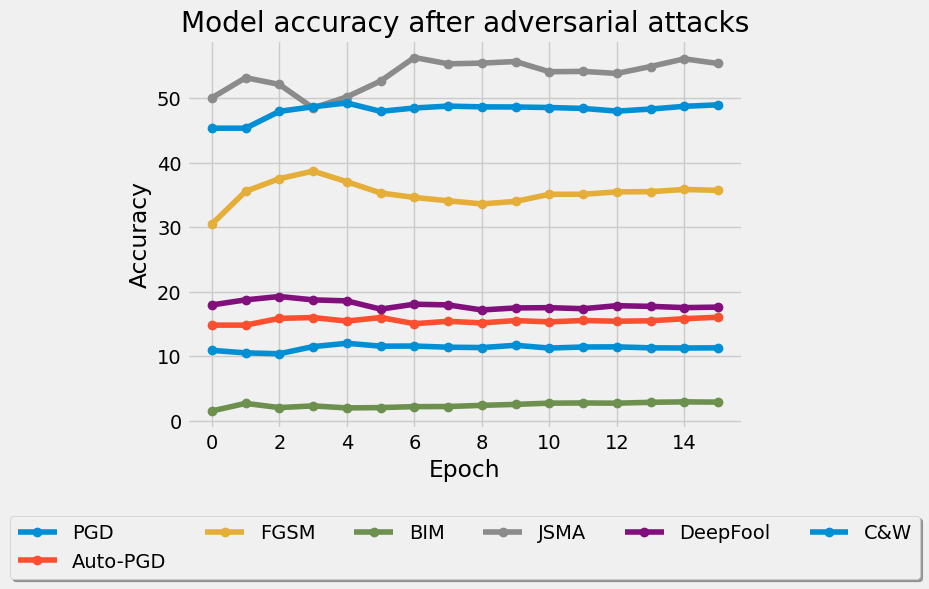

In [69]:
plt.plot(PGD_accu,'-o')
plt.plot(Auto_PGD_accu,'-o')

plt.plot(adv_accu,'-o')
plt.plot(bim_accu, '-o')
plt.plot(jsma_accu, '-o')
plt.plot(Deepfool_accu, '-o')
plt.plot(cw_accu, '-o')

#plt.plot(ape_gan_acc1, '-o')
#plt.plot(ape_gan_acc2, '-o')
#plt.plot(ape_gan_acc3, '-o')
#plt.plot(ape_gan_acc4, '-o')
#plt.plot(ape_gan_acc5, '-o')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['PGD', 'Auto-PGD','FGSM', 'BIM', 'JSMA', 'DeepFool', 'C&W'], loc='upper center', bbox_to_anchor=(0.5, -0.199),
          fancybox=True, shadow=True, ncol=6)
plt.title('Model accuracy after adversarial attacks')
plt.show()

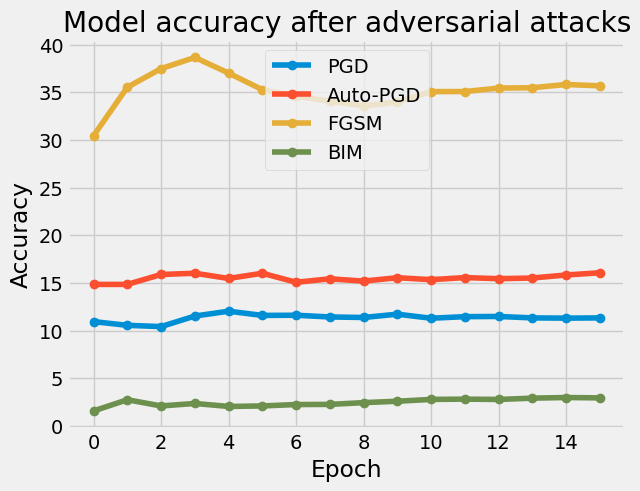

In [70]:
plt.plot(PGD_accu,'-o')
plt.plot(Auto_PGD_accu,'-o')
plt.plot(adv_accu,'-o')
plt.plot(bim_accu, '-o')


plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['PGD', 'Auto-PGD','FGSM', 'BIM'])
plt.title('Model accuracy after adversarial attacks')
plt.show()


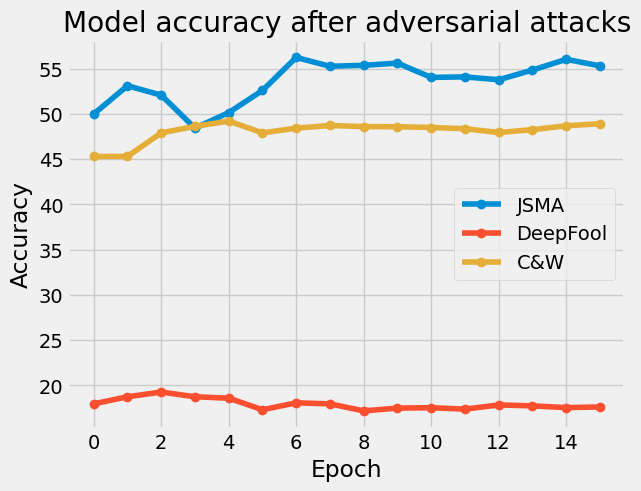

In [71]:
plt.plot(jsma_accu, '-o')
plt.plot(Deepfool_accu, '-o')
plt.plot(cw_accu, '-o')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['JSMA', 'DeepFool', 'C&W'])
plt.title('Model accuracy after adversarial attacks')
plt.show()

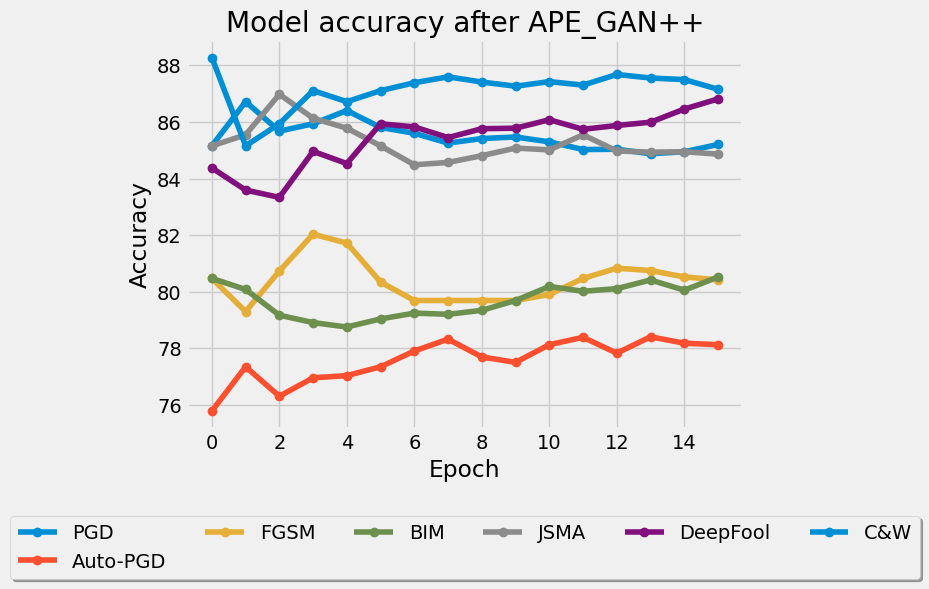

In [72]:
plt.plot(ape_gan_acc0, '-o')
plt.plot(ape_gan_acc00, '-o')
plt.plot(ape_gan_acc1, '-o')
plt.plot(ape_gan_acc2, '-o')
plt.plot(ape_gan_acc3, '-o')
plt.plot(ape_gan_acc4, '-o')
plt.plot(ape_gan_acc5, '-o')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['PGD', 'Auto-PGD', 'FGSM', 'BIM', 'JSMA', 'DeepFool', 'C&W'], loc='upper center', bbox_to_anchor=(0.5, -0.199),
          fancybox=True, shadow=True, ncol=6)
plt.title('Model accuracy after APE_GAN++')
plt.show()

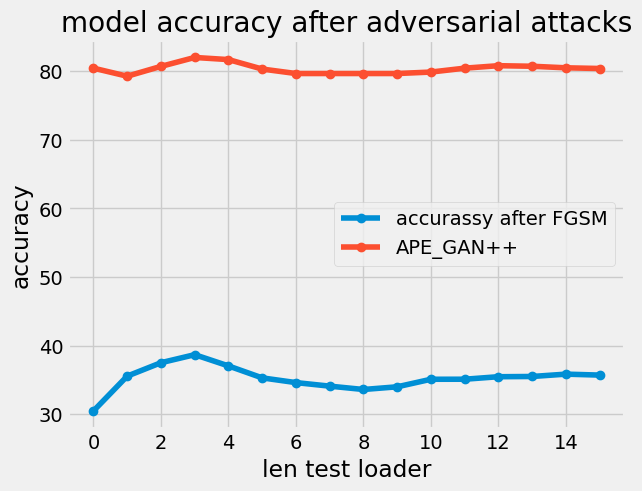

In [73]:
plt.plot(adv_accu,'-o')
plt.plot(ape_gan_acc1, '-o')
#F1 score, recall ... 

plt.xlabel('len test loader')
plt.ylabel('accuracy')
plt.legend(['accurassy after FGSM', 'APE_GAN++'])
plt.title('model accuracy after adversarial attacks')
plt.show()

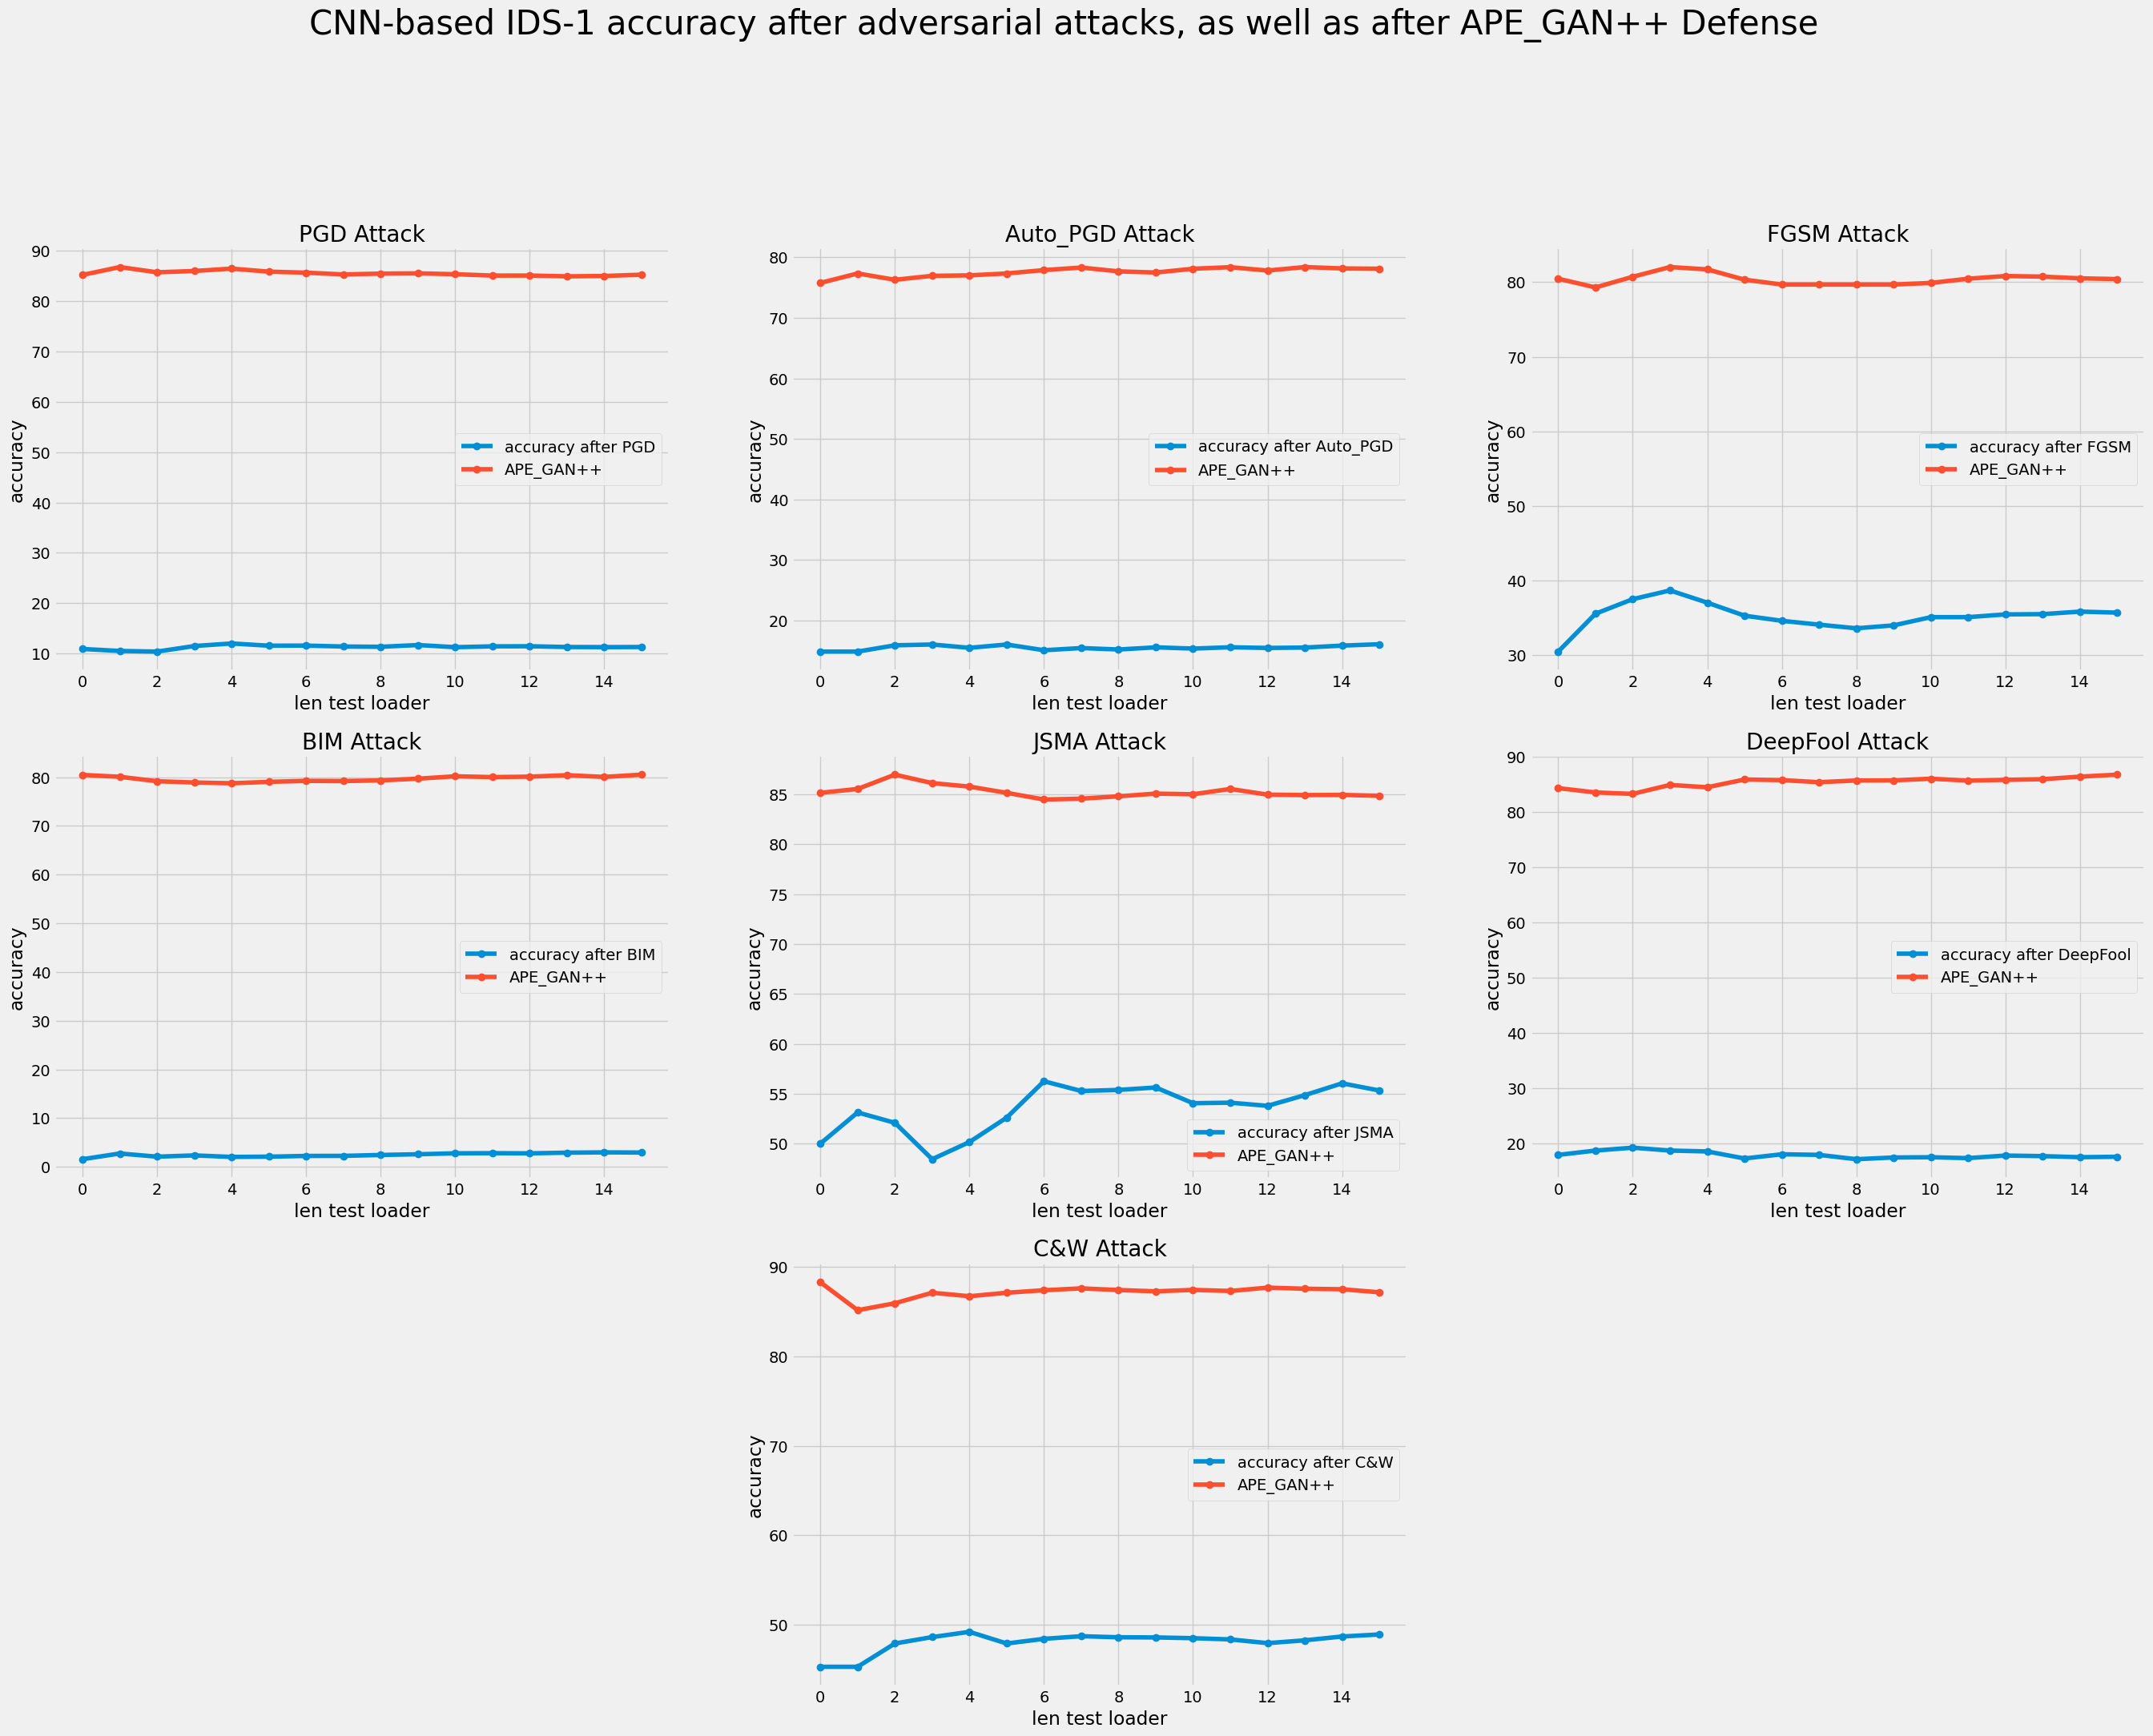

In [74]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(30, 30))
fig.suptitle('CNN-based IDS-1 accuracy after adversarial attacks, as well as after APE_GAN++ Defense', fontsize=30)

ax1 = plt.subplot2grid((4, 3), (0, 0))
ax1.plot(PGD_accu, 'o-')
ax1.plot(ape_gan_acc0, 'o-')
ax1.set(xlabel='len test loader', ylabel='accuracy')
ax1.set_title('PGD Attack')
ax1.legend(['accuracy after PGD', 'APE_GAN++'])


ax2 = plt.subplot2grid((4, 3), (0, 1))
ax2.plot(Auto_PGD_accu, 'o-')
ax2.plot(ape_gan_acc00, 'o-')
ax2.set(xlabel='len test loader', ylabel='accuracy')
ax2.set_title('Auto_PGD Attack')
ax2.legend(['accuracy after Auto_PGD', 'APE_GAN++'])

ax3 = plt.subplot2grid((4, 3), (0, 2))
ax3.plot(adv_accu, 'o-')
ax3.plot(ape_gan_acc1, 'o-')
ax3.set(xlabel='len test loader', ylabel='accuracy')
ax3.set_title('FGSM Attack')
ax3.legend(['accuracy after FGSM', 'APE_GAN++'])

ax4 = plt.subplot2grid((4, 3), (1, 0))
ax4.plot(bim_accu, 'o-')
ax4.plot(ape_gan_acc2, 'o-')
ax4.set(xlabel='len test loader', ylabel='accuracy')
ax4.set_title('BIM Attack')
ax4.legend(['accuracy after BIM', 'APE_GAN++'])

ax5 = plt.subplot2grid((4, 3), (1, 1))
ax5.plot(jsma_accu, 'o-')
ax5.plot(ape_gan_acc3, 'o-')
ax5.set(xlabel='len test loader', ylabel='accuracy')
ax5.set_title('JSMA Attack')
ax5.legend(['accuracy after JSMA', 'APE_GAN++'])

ax6 = plt.subplot2grid((4, 3), (1, 2))
ax6.plot(Deepfool_accu, 'o-')
ax6.plot(ape_gan_acc4, 'o-')
ax6.set(xlabel='len test loader', ylabel='accuracy')
ax6.set_title('DeepFool Attack')
ax6.legend(['accuracy after DeepFool', 'APE_GAN++'])

ax7 = plt.subplot2grid((4, 3), (2, 1))
ax7.plot(cw_accu, 'o-')
ax7.plot(ape_gan_acc5, 'o-')
ax7.set(xlabel='len test loader', ylabel='accuracy')
ax7.set_title('C&W Attack')
ax7.legend(['accuracy after C&W', 'APE_GAN++'])
